
#### M13_Challenge_KonradK_venture_funding_with_deep_learning.ipynb
# Konrad Kozicki
### UCB-VIRT-FIN-PT-12-2020-U-B-TTH
---

# Venture Funding with Deep Learning


In [1]:
# Imports
import pandas as pd
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

import matplotlib.pyplot as plt

%matplotlib inline

---

## Prepare the data to be used on a neural network model

### Step 1: Read the `applicants_data.csv` file into a Pandas DataFrame. Review the DataFrame, looking for categorical variables that will need to be encoded, as well as columns that could eventually define your features and target variables.  


In [2]:
# Read the applicants_data.csv file from the Resources folder into a Pandas DataFrame
applicant_data_df = pd.read_csv(
    Path("./Resources/applicants_data.csv")
)

# Review the DataFrame
applicant_data_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Review the data types associated with the columns
applicant_data_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

>>>> 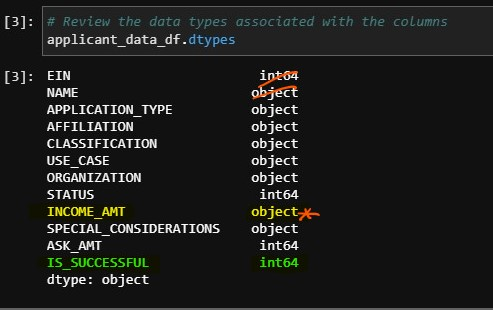

### Step 2: Drop the “EIN” (Employer Identification Number) and “NAME” columns from the DataFrame, because they are not relevant to the binary classification model.

In [4]:
# Drop the 'EIN' and 'NAME' columns from the DataFrame
applicant_data_df = applicant_data_df.drop(columns = ["EIN", "NAME"])

# Review the DataFrame
applicant_data_df[:5]

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


### Step 3: Encode the dataset’s categorical variables using `OneHotEncoder`, and then place the encoded variables into a new DataFrame.

In [5]:
# Create a list of categorical variables 
categorical_variables = list(applicant_data_df.dtypes[applicant_data_df.dtypes == "object"].index)

# Display the categorical variables list
categorical_variables

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [6]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

In [7]:
# Encode the categorcal variables using OneHotEncoder
encoded_data = enc.fit_transform(applicant_data_df[categorical_variables])

In [8]:
# Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(
    encoded_data,
    columns = enc.get_feature_names(categorical_variables)
)

# Review the DataFrame
encoded_df.head()

,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Step 4: Add the original DataFrame’s numerical variables to the DataFrame containing the encoded variables.

> **Note** To complete this step, you will employ the Pandas `concat()` function that was introduced earlier in this course. 

In [9]:
numerical_variables_df = applicant_data_df.drop(columns = categorical_variables)

# Review the DataFrame
numerical_variables_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL
0,1,5000,1
1,1,108590,1
2,1,5000,0
3,1,6692,1
4,1,142590,1


In [10]:
# Add the numerical variables from the original DataFrame to the one-hot encoding DataFrame
fully_encoded_df = pd.concat(
    [
        numerical_variables_df,
        encoded_df
    ],
    axis=1
)

# Review the Dataframe
fully_encoded_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
applicant_data_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [12]:
fully_encoded_df.dtypes

STATUS                        int64
ASK_AMT                       int64
IS_SUCCESSFUL                 int64
APPLICATION_TYPE_T10        float64
APPLICATION_TYPE_T12        float64
                             ...   
INCOME_AMT_25000-99999      float64
INCOME_AMT_50M+             float64
INCOME_AMT_5M-10M           float64
SPECIAL_CONSIDERATIONS_N    float64
SPECIAL_CONSIDERATIONS_Y    float64
Length: 117, dtype: object

### Step 5: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the  DataFrame column “IS_SUCCESSFUL”. The remaining columns should define the features dataset. 



In [13]:
# Define the target set y using the IS_SUCCESSFUL column
y = fully_encoded_df["IS_SUCCESSFUL"]

# Display a sample of y
y[:5]

0    1
1    1
2    0
3    1
4    1
Name: IS_SUCCESSFUL, dtype: int64

In [14]:
# Define features set X by selecting all columns but IS_SUCCESSFUL
X = fully_encoded_df.drop(columns=["IS_SUCCESSFUL"])


# Review the features DataFrame
X.head()

,STATUS,ASK_AMT,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Step 6: Split the features and target sets into training and testing datasets.


In [15]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


### Step 7: Use scikit-learn's `StandardScaler` to scale the features data.

In [16]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

---

## Compile and Evaluate a Binary Classification Model Using a Neural Network

### Step 1: Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.


In [17]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

116

In [18]:























# Define the number of neurons in the output layer
number_output_neurons = 1

In [19]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 =  (number_input_features + number_output_neurons) // 2

# Review the number hidden nodes in the first layer
hidden_nodes_layer1

58

In [20]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 = (hidden_nodes_layer1 + number_output_neurons) // 2

# Review the number hidden nodes in the second layer
hidden_nodes_layer2

29

In [21]:
# Create the Sequential model instance
nn = Sequential() 

In [22]:
# Add the first hidden layer
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

In [23]:
# Add the second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

In [24]:
# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(units=number_output_neurons, activation="sigmoid"))

In [25]:
# Display the Sequential model summary
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 58)                6786      
_________________________________________________________________
dense_1 (Dense)              (None, 29)                1711      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 30        
Total params: 8,527
Trainable params: 8,527
Non-trainable params: 0
_________________________________________________________________


### Step 2: Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [26]:
# Compile the Sequential model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [27]:
# Fit the model using 50 epochs and the training data
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 1s 841us/step - loss: 0.5960 - accuracy: 0.7097
Epoch 2/50
804/804 [==============================] - 1s 787us/step - loss: 0.5554 - accuracy: 0.7277
Epoch 3/50
804/804 [==============================] - 1s 792us/step - loss: 0.5517 - accuracy: 0.7321
Epoch 4/50
804/804 [==============================] - 1s 898us/step - loss: 0.5404 - accuracy: 0.7376
Epoch 5/50
804/804 [==============================] - 1s 802us/step - loss: 0.5471 - accuracy: 0.7328
Epoch 6/50
804/804 [==============================] - 1s 825us/step - loss: 0.5439 - accuracy: 0.7334
Epoch 7/50
804/804 [==============================] - 1s 907us/step - loss: 0.5375 - accuracy: 0.7399
Epoch 8/50
804/804 [==============================] - 1s 803us/step - loss: 0.5456 - accuracy: 0.7288
Epoch 9/50
804/804 [==============================] - 1s 838us/step - loss: 0.5421 - accuracy: 0.7332
Epoch 10/50
804/804 [==============================] - 1s 862us/step - loss: 0.541

### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


In [28]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5537 - accuracy: 0.7304
Loss: 0.5536527037620544, Accuracy: 0.7303789854049683


### Step 4: Save and export your model to an HDF5 file, and name the file `AlphabetSoup.h5`. 


In [29]:
# Set the model's file path
file_path = Path("./Resources/AlphabetSoup.h5")

# Export your model to a HDF5 file
nn.save(file_path)

---

## Optimize the neural network model


### Step 1: Define at least three new deep neural network models (resulting in the original plus 3 optimization attempts). With each, try to improve on your first model’s predictive accuracy.

> **Rewind** Recall that perfect accuracy has a value of 1, so accuracy improves as its value moves closer to 1. To optimize your model for a predictive accuracy as close to 1 as possible, you can use any or all of the following techniques:
>
> * Adjust the input data by dropping different features columns to ensure that no variables or outliers confuse the model.
>
> * Add more neurons (nodes) to a hidden layer.
>
> * Add more hidden layers.
>
> * Use different activation functions for the hidden layers.
>
> * Add to or reduce the number of epochs in the training regimen.


### Alternative Model 1

In [30]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

116

In [31]:
# Define the number of neurons in the output layer
number_output_neurons_A1 = 1

In [32]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A1 =  (number_input_features + number_output_neurons_A1) // 2

# Review the number hidden nodes in the first layer
hidden_nodes_layer1_A1

58

In [33]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer2_A1 =  (hidden_nodes_layer1_A1 + number_output_neurons_A1) // 2

# Review the number hidden nodes in the first layer
hidden_nodes_layer2_A1

29

In [34]:
# Create the Sequential model instance
nn_A1 = Sequential()

In [35]:
# First hidden layer
nn_A1.add(Dense(units=hidden_nodes_layer1_A1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_A1.add(Dense(units=hidden_nodes_layer2_A1, activation="relu"))

# Output layer
nn_A1.add(Dense(units=number_output_neurons_A1, activation="sigmoid"))

# Check the structure of the model
nn_A1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 58)                6786      
_________________________________________________________________
dense_4 (Dense)              (None, 29)                1711      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 30        
Total params: 8,527
Trainable params: 8,527
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Compile the Sequential model
nn_A1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [61]:
# Fit the model using 50 epochs and the training data
fit_model_A1 = nn_A1.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 848us/step - loss: 0.5323 - accuracy: 0.7417
Epoch 2/100
804/804 [==============================] - 1s 792us/step - loss: 0.5320 - accuracy: 0.7404
Epoch 3/100
804/804 [==============================] - 1s 777us/step - loss: 0.5318 - accuracy: 0.7410
Epoch 4/100
804/804 [==============================] - 1s 817us/step - loss: 0.5320 - accuracy: 0.7413
Epoch 5/100
804/804 [==============================] - 1s 791us/step - loss: 0.5316 - accuracy: 0.7407
Epoch 6/100
804/804 [==============================] - 1s 777us/step - loss: 0.5314 - accuracy: 0.7408
Epoch 7/100
804/804 [==============================] - 1s 852us/step - loss: 0.5312 - accuracy: 0.7413
Epoch 8/100
804/804 [==============================] - 1s 802us/step - loss: 0.5313 - accuracy: 0.7410
Epoch 9/100
804/804 [==============================] - 1s 794us/step - loss: 0.5315 - accuracy: 0.7410
Epoch 10/100
804/804 [==============================] - 1s 787us/step - l

#### Alternative Model 2

In [38]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

116

In [39]:
# Define the number of neurons in the output layer
number_output_neurons_A2 = 1

In [40]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A2 = (number_input_features + number_output_neurons_A2) // 2

# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A2

58

In [41]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A2 = (hidden_nodes_layer1_A2 + number_output_neurons_A2) // 2

# Review the number of hidden nodes in the first layer
hidden_nodes_layer2_A2

29

In [42]:
# Create the Sequential model instance
nn_A2 = Sequential()

In [43]:
# First hidden layer
nn_A2.add(Dense(units=hidden_nodes_layer1_A2, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_A2.add(Dense(units=hidden_nodes_layer2_A2, activation="relu"))

# Output layer
nn_A2.add(Dense(units=number_output_neurons_A2, activation="sigmoid"))

# Check the structure of the model
nn_A2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 58)                6786      
_________________________________________________________________
dense_7 (Dense)              (None, 29)                1711      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 30        
Total params: 8,527
Trainable params: 8,527
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Compile the model
nn_A2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [45]:
# Fit the model
fit_model_A2 = nn_A2.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 1s 832us/step - loss: 0.6090 - accuracy: 0.6831
Epoch 2/50
804/804 [==============================] - 1s 793us/step - loss: 0.5507 - accuracy: 0.7347
Epoch 3/50
804/804 [==============================] - 1s 771us/step - loss: 0.5496 - accuracy: 0.7301
Epoch 4/50
804/804 [==============================] - 1s 831us/step - loss: 0.5492 - accuracy: 0.7305
Epoch 5/50
804/804 [==============================] - 1s 756us/step - loss: 0.5494 - accuracy: 0.7317
Epoch 6/50
804/804 [==============================] - 1s 777us/step - loss: 0.5460 - accuracy: 0.7304
Epoch 7/50
804/804 [==============================] - 1s 813us/step - loss: 0.5474 - accuracy: 0.7321
Epoch 8/50
804/804 [==============================] - 1s 787us/step - loss: 0.5423 - accuracy: 0.7356
Epoch 9/50
804/804 [==============================] - 1s 810us/step - loss: 0.5414 - accuracy: 0.7352
Epoch 10/50
804/804 [==============================] - 1s 818us/step - loss: 0.537

#### Alternative Model 3

In [46]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

116

In [47]:
# Define the number of neurons in the output layer
number_output_neurons_A3 = 1

In [48]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A3 = (number_input_features + number_output_neurons_A3) // 2

# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A3

58

In [49]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A3 = (hidden_nodes_layer1_A3 + number_output_neurons_A3) // 2

# Review the number of hidden nodes in the first layer
hidden_nodes_layer2_A3

29

In [50]:
# Create the Sequential model instance
nn_A3 = Sequential()

In [51]:
# First hidden layer
nn_A3.add(Dense(units=hidden_nodes_layer1_A3, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_A3.add(Dense(units=hidden_nodes_layer2_A3, activation="relu"))

# Output layer
nn_A3.add(Dense(units=number_output_neurons_A3, activation="sigmoid"))

# Check the structure of the model
nn_A3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 58)                6786      
_________________________________________________________________
dense_10 (Dense)             (None, 29)                1711      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 30        
Total params: 8,527
Trainable params: 8,527
Non-trainable params: 0
_________________________________________________________________


In [52]:
# Compile the model
nn_A3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [53]:
# Fit the model
fit_model_A3 = nn_A3.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 1s 791us/step - loss: 0.6006 - accuracy: 0.7036
Epoch 2/50
804/804 [==============================] - 1s 813us/step - loss: 0.5508 - accuracy: 0.7306
Epoch 3/50
804/804 [==============================] - 1s 783us/step - loss: 0.5482 - accuracy: 0.7330
Epoch 4/50
804/804 [==============================] - 1s 816us/step - loss: 0.5444 - accuracy: 0.7338
Epoch 5/50
804/804 [==============================] - 1s 904us/step - loss: 0.5479 - accuracy: 0.7308
Epoch 6/50
804/804 [==============================] - 1s 858us/step - loss: 0.5445 - accuracy: 0.7331
Epoch 7/50
804/804 [==============================] - 1s 803us/step - loss: 0.5427 - accuracy: 0.7334
Epoch 8/50
804/804 [==============================] - 1s 916us/step - loss: 0.5363 - accuracy: 0.7406
Epoch 9/50
804/804 [==============================] - 1s 846us/step - loss: 0.5396 - accuracy: 0.7381
Epoch 10/50
804/804 [==============================] - 1s 820us/step - loss: 0.543

### Step 2: After finishing your models, display the accuracy scores achieved by each model, and compare the results.

Original Model Results
268/268 [==============================] - 0s 637us/step - loss: 0.5537 - accuracy: 0.7304
Loss: 0.5536527037620544, Accuracy: 0.7303789854049683


<AxesSubplot:title={'center':'model_accuracy: Original'}>

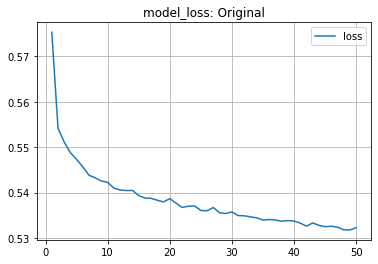

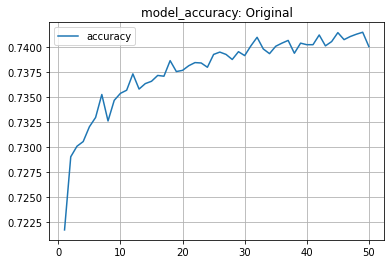

In [66]:
print("Original Model Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=1)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

model_plot = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history["loss"]) + 1))
model_plot.plot(y="loss", grid=True, title="model_loss: Original")
model_plot.plot(y="accuracy", grid=True, title="model_accuracy: Original")

Alternative Model 4 Results
268/268 [==============================] - 0s 569us/step - loss: 0.5677 - accuracy: 0.7297
Loss: 0.5677022337913513, Accuracy: 0.72967928647995


<AxesSubplot:title={'center':'model_accuracy: A4'}>

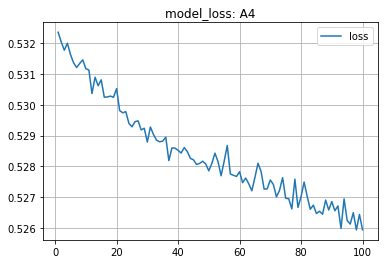

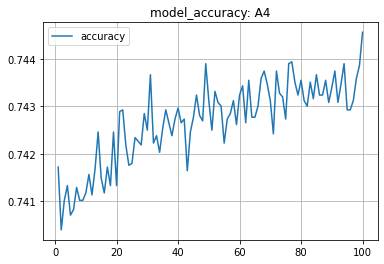

In [65]:
print("Alternative Model 4 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A1.evaluate(X_test_scaled,y_test,verbose=1)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

model_plot_A4 = pd.DataFrame(fit_model_A1.history, index=range(1, len(fit_model_A1.history["loss"]) + 1))
model_plot_A4.plot(y="loss", title="model_loss: A4", grid=True)
model_plot_A4.plot(y="accuracy", title="model_accuracy: A4", grid=True)

Alternative Model 5 Results
268/268 [==============================] - 0s 579us/step - loss: 0.5533 - accuracy: 0.7307
Loss: 0.5532741546630859, Accuracy: 0.7307288646697998


<AxesSubplot:title={'center':'model_accuracy: A5'}>

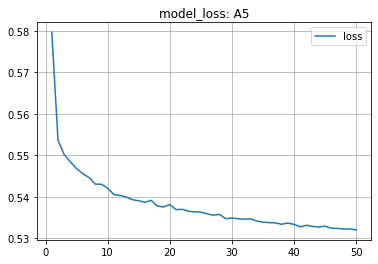

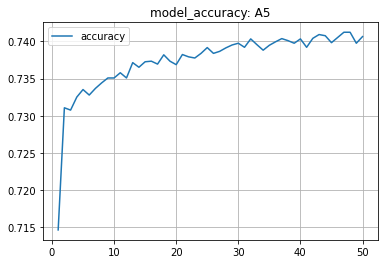

In [67]:
print("Alternative Model 5 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A2.evaluate(X_test_scaled,y_test,verbose=1)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

model_plot_A5 = pd.DataFrame(fit_model_A2.history, index=range(1, len(fit_model_A2.history["loss"]) + 1))
model_plot_A5.plot(y="loss", grid=True, title="model_loss: A5")
model_plot_A5.plot(y="accuracy", grid=True, title="model_accuracy: A5")

Alternative Model 6 Results
268/268 [==============================] - 0s 611us/step - loss: 0.5547 - accuracy: 0.7298
Loss: 0.554682731628418, Accuracy: 0.7297959327697754


<AxesSubplot:title={'center':'model_accuracy: A6'}>

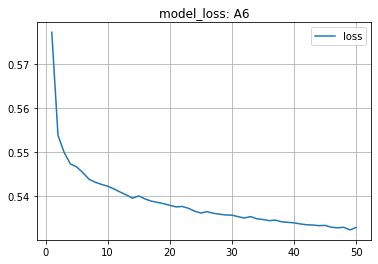

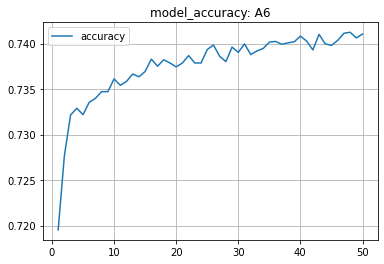

In [68]:
print("Alternative Model 6 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A3.evaluate(X_test_scaled,y_test,verbose=1)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

model_plot_A6 = pd.DataFrame(fit_model_A3.history, index=range(1, len(fit_model_A3.history["loss"]) + 1))
model_plot_A6.plot(y="loss", grid=True, title="model_loss: A6")
model_plot_A6.plot(y="accuracy", grid=True, title="model_accuracy: A6")





# plt.plot(model_1.history["loss"])
# plt.title("loss_function - 1 hidden layer")
# plt.legend(["loss"])
# plt.show()

# plt.plot(fit_model.history["loss"])
# plt.plot(fit_model_A3.history["loss"])
# plt.title("loss_function - Training")
# plt.legend(["Original Model", "2 hidden layers"])
# plt.show()

### Step 3: Save each of your alternative models as an HDF5 file.


In [58]:
# Set the file path for the first alternative model
file_path = Path("./Resources/sandbox_AlphabetSoup_A4.h5")

# Export your model to a HDF5 file
nn_A1.save(file_path)

In [59]:
# Set the file path for the second alternative model
file_path = Path("./Resources/sandbox_AlphabetSoup_A5.h5")

# Export your model to a HDF5 file
nn_A2.save(file_path)

In [60]:
# Set the file path for the third alternative model
file_path = Path("./Resources/sandbox_AlphabetSoup_A6.h5")

# Export your model to a HDF5 file
nn_A3.save(file_path)